,grounded,nli,random,ccg
factives,0.541,0.744,0.711,0.619
implicatives_true,0.763,0.672,0.694,0.784
neutral_to,0.803,0.689,0.654,0.780
neutral_that,0.690,0.653,0.671,0.681
implicatives_one_way,0.846,0.738,0.754,0.815
implicatives_forget_to,0.443,0.714,0.643,0.486


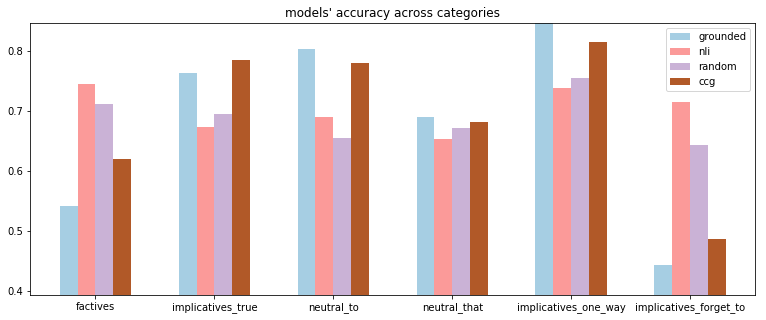

In [20]:
'''This cell generates a graph that plots models and their accuracies on different probing categories'''

#names of files (i.e. the files in meta)
categories = ["factives", "implicatives_true", "neutral_to", "neutral_that", \
              "implicatives_one_way", "implicatives_forget_to"]




meta_category_df = pd.DataFrame(columns=models, \
                             index=categories)

for model in models:

    model_info = {}
    
    for category in categories:
        meta_df = pd.read_csv('/nfs/jsalt/share/models_to_probe/results/meta/{}.tsv'.format(category), delimiter='\t')
        meta_df = meta_df.replace({"gold_label": map_labels})

        predictions_df = pd.read_csv('/nfs/jsalt/share/models_to_probe/results/{}/{}.tsv'.format(model, category), delimiter='\t')
        predictions_df = predictions_df.replace({"prediction": mnli_map_labels})

        combined_df = meta_df.copy()
        combined_df["model_prediction"]=predictions_df['prediction']

        model_info[category]=compute_accuracy(combined_df)
        
    meta_category_df[model]=meta_category_df.index.map(model_info)
    
y_min = min(meta_category_df.min())
y_max = max(meta_category_df.max())
plot = meta_category_df.plot.bar(figsize=(13,5), title="models' accuracy across categories", colormap="Paired", width=.6, ylim=(max(y_min-.05, 0), y_max)).legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
display(meta_category_df)

general accuracy:  0.541 , # examples:  270


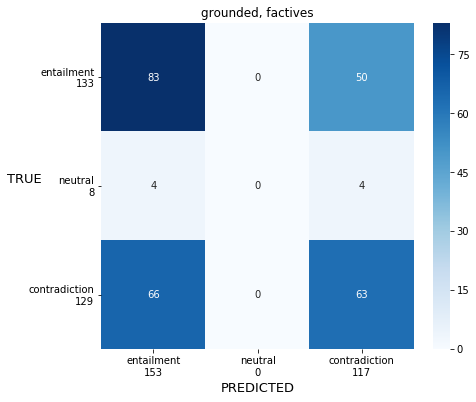

In [19]:
import socket

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
import matplotlib.patches as patches
import math
from sklearn import metrics
from plot_confusion_matrix import plot_confusion_matrix


'''This file creates a confusion matrix for a specific model in a specific category of tasks'''

#category is the name of the file in meta
category = "factives"

#model whose confusion matrix you want
model = "grounded"

#!! set map_labels equal to mnli_map_labels if your meta-file uses MNLI's labels (i.e. after Ellie changed aggregated)
map_labels={2:"entailment", 1: "neutral", 0:"contradiction"}
mnli_map_labels={1:"entailment", 0: "neutral", 2:"contradiction"}




meta_df = pd.read_csv('/nfs/jsalt/share/models_to_probe/results/meta/{}.tsv'.format(category), delimiter='\t')
meta_df = meta_df.replace({"gold_label": map_labels})

predictions_df = pd.read_csv('/nfs/jsalt/share/models_to_probe/results/{}/{}.tsv'.format(model, category), delimiter='\t')
predictions_df = predictions_df.replace({"prediction": mnli_map_labels})

df2= meta_df.sort_values(by=['tuple_id'])
combined_df = meta_df.copy()
combined_df["model_prediction"]=predictions_df['prediction']

def compute_accuracy(df):
    count = 0
    for i in range(len(df)):
        if df.iloc[i]["gold_label"] == df.iloc[i]["model_prediction"]:
            count += 1
        #else:
            #display(df.iloc[i][0])
    return(round(count/len(df), 3))

def compute_confusion_matrix(df):
    return metrics.confusion_matrix(y_true = df["gold_label"], \
                                    y_pred = df["model_prediction"], \
                                    labels = ["entailment", "neutral", "contradiction"])

print("general accuracy: ", compute_accuracy(combined_df), ", # examples: ", len(combined_df))

plt.figure(figsize = (7,6))

prediction_counts = combined_df['model_prediction'].value_counts().to_dict()
goldlabel_counts = combined_df['gold_label'].value_counts().to_dict()

keys = ['entailment','neutral', 'contradiction']
for key in keys:
    if key not in prediction_counts:
        prediction_counts[key] =0
    if key not in goldlabel_counts:
        goldlabel_counts[key] =0

sns.heatmap(compute_confusion_matrix(combined_df), annot=True, cmap="Blues", \
            xticklabels=["entailment\n{}".format(prediction_counts['entailment']), \
                         "neutral\n{}".format(prediction_counts['neutral']), \
                         "contradiction\n{}".format(prediction_counts['contradiction'])], \
            yticklabels=["entailment\n{}".format(goldlabel_counts['entailment']), \
                         "neutral\n{}".format(goldlabel_counts['neutral']), \
                         "contradiction\n{}".format(goldlabel_counts['contradiction'])])
plt.yticks(rotation=0)
plt.title(model + ", " + category)
plt.xlabel("PREDICTED", fontsize=13)
plt.ylabel("TRUE", rotation=0, fontsize=13)

combined_df_displayable = combined_df[combined_df['gold_label'] !=combined_df['model_prediction']]
combined_df_displayable = combined_df_displayable.drop(['assigned_labels'], axis = 1)
combined_df_displayable = combined_df_displayable[['index', 'gold_label', 'model_prediction', 'sent1', 'sent2', 'predicted_label']]
pd.set_option('display.max_colwidth', -1)

In [18]:
#for seeing what the model got wrong in the confusion matrix
display(combined_df_displayable)

,index,gold_label,model_prediction,sent1,sent2,predicted_label
4,4,entailment,contradiction,She did not mention that her father was a butcher.,Her father was a butcher.,entailment
5,5,contradiction,entailment,She did not mention that her father was a butcher.,Her father was not a butcher.,contradiction
8,8,entailment,contradiction,"My dear young lady, as far as I recollect I only did not mention that there were equally good situations to be obtained elsewhere.",There were equally good situations to be obtained elsewhere.,entailment
9,9,contradiction,entailment,"My dear young lady, as far as I recollect I only did not mention that there were equally good situations to be obtained elsewhere.",There were not equally good situations to be obtained elsewhere.,contradiction
13,13,contradiction,entailment,I must not mention that you hate me for it.,You do not hate me for it.,contradiction
14,14,contradiction,entailment,"I did not mention that I need to either quit or do something else, so I switched to third shift.",I do not need to either quit or do something else.,contradiction
24,24,contradiction,entailment,It's indeed true they did not mention that it was revised quite a bit.,It was not revised quite a bit.,contradiction
25,25,entailment,contradiction,It's indeed true they did not mention that it was revised quite a bit.,It was revised quite a bit.,entailment
30,30,contradiction,entailment,He does not mention that major economies of scale can be applied to the processing and transportation of mail.,Major economies of scale can not be applied to the processing and transportation of mail.,contradiction
31,31,entailment,contradiction,He does not mention that major economies of scale can be applied to the processing and transportation of mail.,Major economies of scale can be applied to the processing and transportation of mail.,entailment
